## Overview

YRoots is a numerical rootfinding package that quickly and precisely finds and returns all of the real roots of a system of equations in a compact interval in $\mathbb{R}^n$.

Yroots is guaranteed to work as long as the functions entered are smooth and contiuous on the search interval and all roots in the search interval are simple and finite in number. Under these assumptions, YRoots can find and return the zeros of even complex systems of equations with several variables.

This notebook has two parts. First there is a tutorial to learn how to use YRoots. Later, we will demo the power of YRoots in solving particularly challenging rootfinding problems.

<h1 align="center"> YRoots Tutorial </h1>

## YRoots Syntax

The YRoots solver takes as input a list of functions as well as a list of lower bounds together with a list of upper bounds defining a search interval. It returns a numpy array with each row containing the coordinates (in dimesion order) of the root. The syntax for calling the solve function is as follows:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ callable functions in $n$ variables, `a` is a list of the $n$ lower bounds in each dimension, and `b` is a list of the correspondnig $n$ upper bounds. This tutorial contains several examples that demonstrate this syntax. 

## Setup YRoots

First, in a terminal (Linux/Unix/Mac), navigate to the directory in which you wish to install `yroots`, then download it from github with the following command:

  ```git
      git clone https://github.com/tylerjarvis/RootFinding.git   
  ```
  
Then make the `yroots` module availabe to Python, use the following command: 

  ```
      pip install -e ./RootFinding
  ```

In addition, you will need to have `numpy`, `numba`, and `scipy` installed in order to run YRoots. See the documentation for the corresponding packages to learn how to install any of these.

<u>Before proceeding in this tutorial, you will need to complete the above process and run the following import statements: </u>

In [1]:
import numpy as np
import yroots as yr

## Example 1: Bivariate System
Consider the following bivariate system of equations:

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the system subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are common roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6 $$
on the search domain $[-1,0]\times[-2,1]$.

To find the roots of this system, simply define the corresponding functions, lower bounds, and upper bounds in the correct format (lists or numpy arrays) and pass these as arguments to the solve function:

NOTE: <u> YRoots uses just in time compiling</u>, which means that part of the code will not be compiled until a system of functions to solve is given (rather than compiling all the code upon importing the module). Therefore, <u>the very first time a system of equations of a particular dimension is passed to the solver, the compilation will take several seconds before the solver actually begins to run.</u> To see the true speed of the solver, simply run the code again. This second iteration, and any other systems of equations of the same dimension, will run at the true speed after this first compilation.

In [2]:
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y
roots = yr.solve([f,g], a, b)

print(roots)

[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


To give a measure for the speed and accuracy of the search, the following cell of code prints the time taken for the search and the *residuals* of the roots, or the absolute difference between the actual function values at the computed roots and zero:

In [3]:
%time roots = yr.solve([f,g], a, b)

print('residuals for f are {}'.format(np.abs(f(roots[:,0],roots[:,1]))))
print('residuals for g are {}'.format(np.abs(g(roots[:,0],roots[:,1]))))

CPU times: total: 109 ms
Wall time: 86.5 ms
residuals for f are [7.21644966e-16 4.99600361e-16]
residuals for g are [1.77635684e-15 8.88178420e-16]


As you can see, using properties of Chebyshev polynomial interpolation, YRoots identified the two roots contained in the search interval very quickly and with near machine-epsilon precision.

## Example 2: Higher-dimensional System

Consider the problem of finding roots of the following 5-dimensional system of equations on the interval $[0,2\pi]^5$:

$$\cos(x_1) + x_5 = 1$$
$$\cos(x_2) + x_4 = 2$$
$$\cos(x_3) + x_3 = 3$$
$$\cos(x_4) + x_2 = 4$$
$$\cos(x_5) + x_1 = 5$$

Go ahead and test out the solver on this system of equations using the code below. The time taken and maximum residual value will also be printed.

Note also that for this problem, we have set the `verbose` option of the solver to True. This can be useful to track the progress of approximation and rootfinding, especially with systems of equations that are high-dimensional or more complex. You will see that short statements are outputted to the terminal, indicating the approximation results, the search interval, and the number of roots found.

NOTE: Since this is the first time we are working in this new dimension (dimension 5) in this notebook, the solver will need to compile new code before it can solve the problem, which will take several seconds. To see the true speed of the solver on this problem, simply rerun the code after the first iteration finishes.

In [4]:
#functions
f1 = lambda x1, x2, x3, x4, x5: np.cos(x1) + x5 - 1
f2 = lambda x1, x2, x3, x4, x5: np.cos(x2) + x4 - 2
f3 = lambda x1, x2, x3, x4, x5: np.cos(x3) + x3 - 3
f4 = lambda x1, x2, x3, x4, x5: np.cos(x4) + x2 - 4
f5 = lambda x1, x2, x3, x4, x5: np.cos(x5) + x1 - 5

#domain
a = [0]*5
b = [2*np.pi]*5

#solve
%time roots = yr.solve([f1,f2,f3,f4,f5],a,b,verbose=True)
print(roots)

#maximum residual
print(np.max([np.abs(f(*[roots[:,i] for i in range(5)])) for f in [f1,f2,f3,f4,f5]]))

Approximation shapes: 0: (19, 1, 1, 1, 2) 1: (1, 19, 1, 2, 1) 2: (1, 1, 19, 1, 1) 3: (1, 2, 1, 19, 1) 4: (2, 1, 1, 1, 19)
Searching on interval [[0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586]]
Finding roots... *
Found 1 root

CPU times: total: 20.6 s
Wall time: 21.8 s
[[4.57744547 4.55389487 3.79438861 2.15783137 1.13453433]]
8.43769498715119e-15


In higher dimensions, as the input functions become more complex, the time YRoots needs to find the roots of the system of functions increases as accurate approximation of such functions require manipulating many more values. However, when compared with other existing rootfinders, YRoots accurately solves such systems of equations with great speed relative.

As an illustration, the following code calls the solver on a more complicated version of the same system of equations solved above. For each function, an additional variable has been added to the cosine term. Try running the code below and watch the solver find the 49 common roots of this system of equations on the search interval, which should take around just 2-3 minutes on a typical computer. Note the low maximum residual value, which will also be printed:

In [5]:
f1 = lambda x1, x2, x3, x4, x5: np.cos(x1*x4) + x5 - 1
f2 = lambda x1, x2, x3, x4, x5: np.cos(x2*x5) + x4 - 2
f3 = lambda x1, x2, x3, x4, x5: np.cos(x3*x1) + x3 - 3
f4 = lambda x1, x2, x3, x4, x5: np.cos(x4*x2) + x2 - 4
f5 = lambda x1, x2, x3, x4, x5: np.cos(x5*x3) + x1 - 5

a = [0]*5
b = [2*np.pi]*5

%time roots = yr.solve([f1,f2,f3,f4,f5],a,b,verbose=True)
print(roots)

#maximum residual
print(np.max([np.abs(f(*[roots[:,i] for i in range(5)])) for f in [f1,f2,f3,f4,f5]]))

Approximation shapes: 0: (47, 1, 1, 47, 2) 1: (1, 47, 1, 2, 48) 2: (48, 1, 48, 1, 1) 3: (1, 48, 1, 48, 1) 4: (2, 1, 48, 1, 48)
Searching on interval [[0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586], [0, 6.283185307179586]]
Finding roots... *************************************************
Found 49 roots

CPU times: total: 1min 11s
Wall time: 1min 14s
[[5.95617903 3.21250323 2.22453203 1.74914246 1.54582102]
 [5.99988277 3.22442619 2.04451747 1.73674702 1.54408297]
 [4.01511593 3.00004825 3.97165144 2.09763587 1.53817437]
 [4.91121894 3.2535773  3.42813666 2.15495463 1.400553  ]
 [5.53092835 3.00184035 3.89071562 2.07289746 0.54758359]
 [5.56130621 3.00387896 3.98524302 2.06235932 0.54369572]
 [4.18254226 3.72815455 2.7014153  1.33784667 0.22721903]
 [4.39710871 3.33966345 2.59537445 1.627007   0.35589322]
 [4.51240438 3.39523359 3.17105066 1.57923199 0.33473531]
 [4.63980737 4.29935039 2.48614721 2.48678558 0.48360851]
 [4.65305679 4.63125

## Example 3: Univariate System

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and `funcs` does not need to be a list.

As an example, find the zeros of $f(x) = \sin(e^{3x})$ on $[-1,2]$ using the code below:

In [6]:
f = lambda x : np.sin(np.exp(3*x))
%time roots = yr.solve(f, -1, 2,)

print(f"Number of roots: {len(roots)}")
print(f"\nMaximum residual: {np.max(np.abs(f(roots)))}")

CPU times: total: 2.36 s
Wall time: 2.62 s
Number of roots: 128

Maximum residual: 6.468437707466133e-13


## Example 4: Using MultiCheb and MultiPower Objects

When a function in a system is a polynomial, it may be useful to pass it in as a YRoots `MultiCheb` or `MultiPower` object, which corresponds to a multivariate polynomials in the Chebyshev basis or in the power basis (respectively). These objects may be more cumbersome to create, but for `MultiCheb` objects, we can simply pass them into the solver (no approximation is needed). Additionally, for `MultiPower` objects, we can perform a change of basis to convert the `MultiPower` object to a `MultiCheb` object. This is faster than actually approximating.

Polynomials in $n$-dimensions are represented by an $n$-dimensional array of coefficients. For a system with three variables, the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficients of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis. It is usually easiest to construct this coefficient tensor by initializing a tensor of zeros and then setting each nonzero coefficient to the correct value.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ could be initialized as 

```python
coeff = np.zeros((4,4)) #4x4 matrix because it's a degree 3 polynomial
coeff[3,0] = 5
coeff[1,2] = 4
coeff[2,0] = 3
coeff[0,2] = 2
coeff[0,0] = 1
f = yr.MultiPower(coeff)
```
                         
Similarly, $g(x,y,z) = 5 T_2(x) + 3T_1(x)T_2(y) + 2$ would be initialized as

```python
coeff = np.zeros((3,3))
coeff[2,0] = 5
coeff[1,2] = 3
coeff[0,0] = 2
g = yr.MultiCheb(coeff)
```

Try out using these special YRoots objects in the following code:


In [7]:
coeff = np.zeros((4,4))
coeff[3,0], coeff[1,2], coeff[2,0], coeff[0,2], coeff[0,0] = 5, 4, 3, 2, 1
f = yr.MultiPower(coeff)

coeff = np.zeros((3,3))
coeff[2,0], coeff[1,2], coeff[0,0] = 5, 3, 2
g = yr.MultiCheb(coeff)

%time roots = yr.solve([f,g],[-1,-1],[1,1])
print(roots)
print("Maximum residuals: f: ", np.max(np.abs(f(roots))), " g: ", np.max(np.abs(g(roots))))

CPU times: total: 46.9 ms
Wall time: 29.4 ms
[[-0.69924092 -0.97485404]
 [-0.69924092  0.97485404]]
Maximum residuals: f:  2.220446049250313e-16  g:  0.0


<h1 align="center"> YRoots Demo </h1>

We will now solve some particularly challenging rootfinding problems. Run the following code to import pyplot from matplotlib

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

## Example 1:

Here is a system of equations on the search domain $[-1,1]\times[-1,1]$ discussed in [a published paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f(x,y) =\sin(30x−y/30)+y$$
$$g(x,y) =\cos(x/30−30y)−x$$

Try running yr.solve on this system using the code below.

NOTE: Due to the use of just in time compiling, the very first time the solver is called after being imported, the compilation may take several seconds before the solver actually begins to run. To see the true speed of the solver, simply run the code again. This second iteration, and any other subsequent calls to the solver with systems of equations of the same dimension, will run at the true speed after this first compilation.

In [11]:
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.cos(x/30-30*y)-x

a = [-1,-1] # lower bounds of search domain
b = [1,1] # upper bounds of search domain

roots =  yr.solve([f,g], a, b, verbose=True)

print(' Maximal residual for f is {} \n Maximal residual for g is {}'. format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))

Approximation shapes: 0: (64, 7) 1: (7, 63)
Searching on interval [[-1, 1], [-1, 1]]
Finding roots... ***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Found 363 roots

 Maximal residual for f is 7.993605777301127e-15 
 Maximal residual for g is 1.3489209749195652e-14


As you can observe, YRoots found all 363 real roots contained in this domain with near machine epsilon precision! Check out the plot of the zero loci (the level curves corresponding to f = 0 and g = 0) along with the roots found by running the code below:

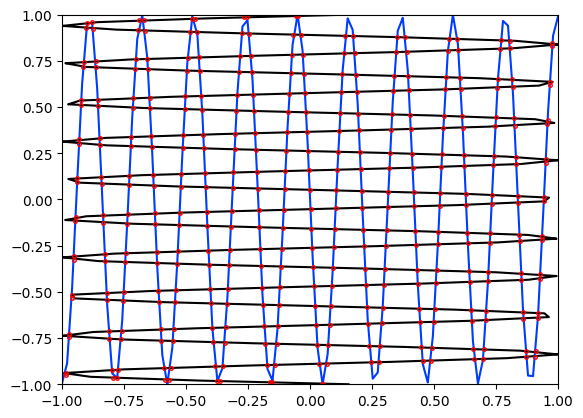

In [12]:
#plot f,g, and the roots
x = np.linspace(-1,1,100)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,g(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)

### Example 2:

Here is a more complicated bivariate system on the region $[-5,5]\times[-5,5]$. It is more complicated because there are many points in the search interval that are "nearly" roots but are not roots.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

The following code runs yr.solve on the system of equations and plots the zero loci. Notice that YRoots correctly avoids points that are nearly roots but are not roots.

Approximation shapes: 0: (147, 25) 1: (95, 57)
Searching on interval [[-5, 5], [-5, 5]]
Finding roots... ********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Found 452 roots

CPU times: total: 1.45 s
Wall time: 2.47 s
 Maximal residual for f is 4.067312926697025e-14 
 Maximal residual for g is 1.815214645262131e-14


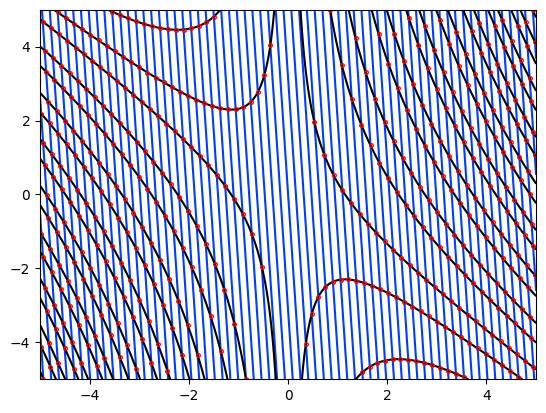

In [13]:
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

%time roots = yr.solve([f,g], a, b, verbose=True)
print(' Maximal residual for f is {} \n Maximal residual for g is {}'.format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))

x = np.linspace(-5,5,500)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,g(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)

### Example 3:

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. The Rosenbrock function, $f(x,y) = (1-x)^2 + 100(y-x^2)^2$ is often used as a performace test for optimization algorithms. While the zero loci run very close to each other, there is an absolute minimum at (1,1). Test the capability of YRoots to solve optimization problems by calling the solver on the partial derivatives of this function:

[[1. 1.]]
 Maximal residual for fx is 3.965716643961059e-13 
 Maximal residual for fy is 0.0


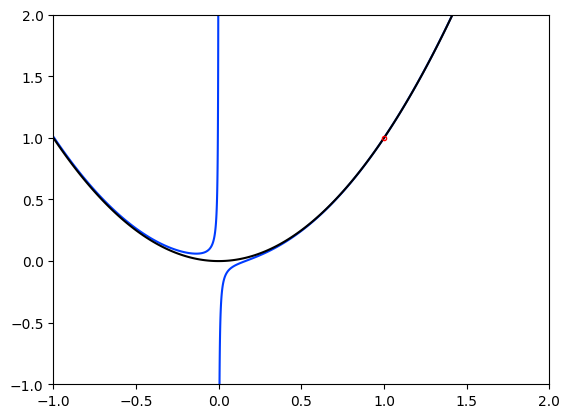

In [14]:
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)
a = [-1,-1]
b = [2,2]
roots = yr.solve([fx,fy],a,b)
print(roots)
print(' Maximal residual for fx is {} \n Maximal residual for fy is {}'.format(np.max(np.abs(fx(roots[:,0],roots[:,1]))),np.max(np.abs(fy(roots[:,0],roots[:,1])))))

x = np.linspace(-1,2,300)
y = np.linspace(-1,2,300)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,fx(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=6)

## Example 4:

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 
$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2)$$

To get an idea of the complexity of this function, run the following cell of code, which gives a 3D plot of the function on the interval $[-1,1]\times[-1,1]$:



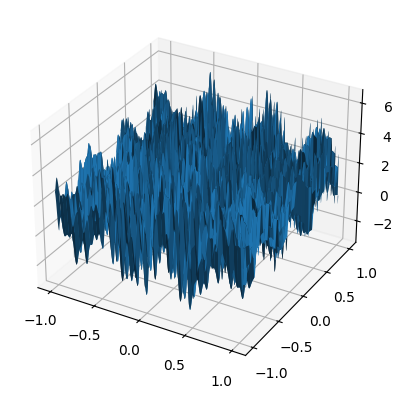

In [15]:
#3D plot of the function to optimize
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

Now run the following code and watch YRoots accurately find and return all 2720 known roots of the partial derivatives of this function on the interval $[-1,1]\times[-1,1]$:

Approximation shapes: 0: (698, 34) 1: (34, 1059)
Searching on interval [[-1.0, 1.0], [-1.0, 1.0]]
Finding roots... *********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

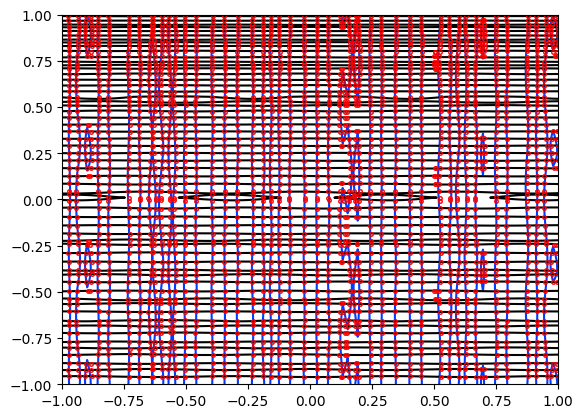

In [16]:
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.cos(80*y)*np.cos(np.sin(80*y))- 10*np.cos(10*(x+y)) + .5 * y
a = -np.ones(2)
b = np.ones(2)
%time roots = yr.solve([fx,fy],a,b, verbose=True)
print(' Maximal residual for fx is {} \n Maximal residual for fy is {}'.format(np.max(np.abs(fx(roots[:,0],roots[:,1]))),np.max(np.abs(fy(roots[:,0],roots[:,1])))))

x = np.linspace(-1,1,100)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,fx(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)


## Example 5:

We round out this exposition of the precision and speed of YRoots in rootfinding with a 3D example. Consider the following system of equations in three variables:

$$ f(x,y,z) = \sin(5x+y+z)$$
$$ g(x,y,z) = \sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$

First, try using yr.solve to find the roots:

NOTE: Since this system of equations is of a new dimension, the compilation of the code needed to solve this problem will take several seconds before the solver actually starts running. Feel free to run it again to see how the time compares after the code is already compiled.

In [18]:
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

%time roots = yr.solve([f,g,h], a, b)
print(roots)
print("Maximum residuals: ", roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)]))))

CPU times: total: 141 ms
Wall time: 154 ms
[[-4.49680650e-01 -8.93189405e-01 -1.93840532e-16]
 [-7.58624217e-01  6.51528432e-01 -2.13672482e-16]
 [-1.96116135e-01  9.80580676e-01 -1.41628591e-16]
 [ 1.96116135e-01 -9.80580676e-01  1.54755172e-16]
 [ 7.58624217e-01 -6.51528432e-01  3.11755923e-17]
 [ 4.49680650e-01  8.93189405e-01 -3.69360194e-16]]
Maximum residuals:  6 2.786999939015111e-15 1.4835351895885846e-16 0.0


To visualize the results of this rootfinding problem, run the code below  which graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

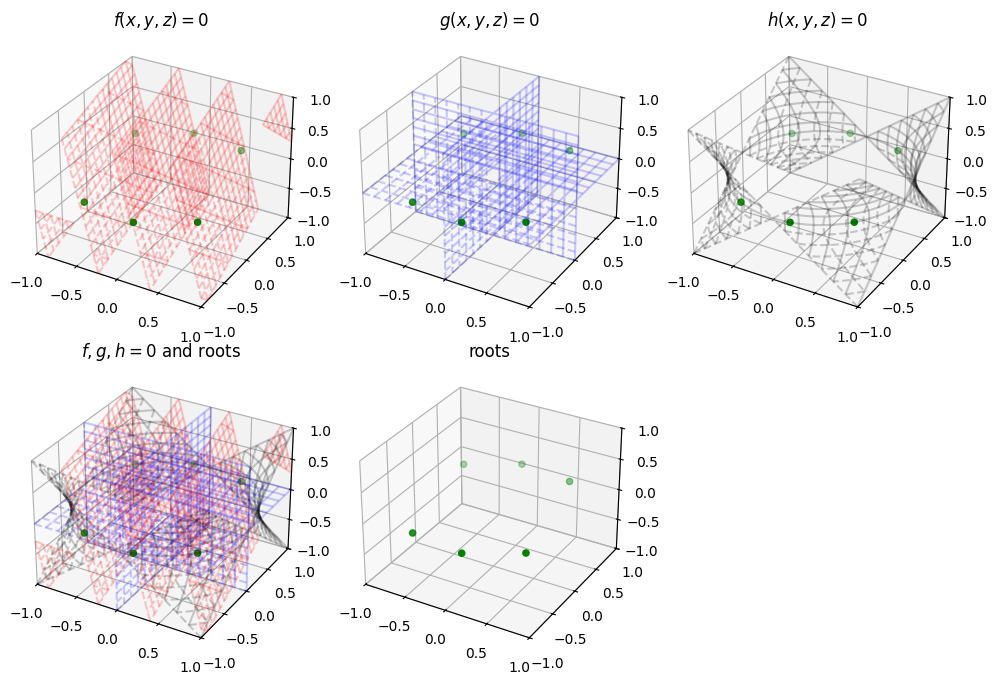

In [19]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
plt.tight_layout()

## Solve Your Own System

While the examples in this tutorial are impressive, they hardly scratch the surface of what is possible.

For example, YRoots is capable of solving systems of equations in higher dimensions as well. In fact, it has accurately solved (over extended periods of time) even ten-dimensional systems of equations (low degree polynomials). And in lower dimensions, YRoots is capable of quickly and accurately solving even the most complicated smooth and continuous functions you can think of, provided the system does not have infinite roots.

Thus, while this tutorial as provided a shallow dive into the power and capabilities of YRoots, the only way to truly comprehend the full depth of its strengths and limitations in rootfinding is to try it out on systems of equations of your choosing. Space is provided below for you to build your own problem and get started.

In [20]:
# Build and solve your own system of equations here.

In [21]:
# Good luck and happy rootfinding!